### Figure 2.A. 
Comparison of U-to-C mismatch percentage between RNA002 (x-axis) and RNA004 (y-axis) for reads with valid coverage of 20.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import sys
import time
import pickle
import os.path as osp
import tqdm
import pysam
import seaborn as sns

## Compute per-base percentages (U-to-C) for RNA004

In [2]:
## consider both T_C (and A_G in reverse) 

BASES = ["A", "C", "G", "T"]

FILE = "08_07_24_R9RNA_GM12878_mRNA_RT_sup_8mods_polyA_sorted_filtered.chr12-112000000-114000000_pysamstats.csv"

time_s = time.time()

RNA_dict = []
header = True
mode = 'w'
RNA_VER = 4
#T2C = f"./RNA00{RNA_VER}_table_T2C.csv"
#A2G = f"./RNA00{RNA_VER}_table_A2G.csv"
T2C_A2G = f"./RNA00{RNA_VER}_table_T2C_A2G.csv"
chunksize = 10**6

with pd.read_csv(FILE, sep="\t", chunksize=chunksize) as reader:
    for i, chunk in enumerate(tqdm.tqdm(reader)):

        valids = chunk[BASES].to_numpy().max(axis=1) >= 20 # sum
        bases_chunk = chunk[['chrom', 'pos', 'ref', *BASES]]
        valid_chunk = bases_chunk[valids]

        # Case 1: Ref is T and Base is C
        T_chunk = valid_chunk.loc[chunk.ref == 'T']
        c_error = (T_chunk['C'] / T_chunk[BASES].sum(axis=1)) >= 0.0 #0.20
        T_chunk_c_read = T_chunk[c_error]

        percentages_T2C = T_chunk_c_read[BASES].div(T_chunk_c_read[BASES].sum(axis=1), axis=0)
        percentages_T2C.columns = [c + '_perc' for c in percentages_T2C.columns]

        df_T2C = pd.concat([T_chunk_c_read, percentages_T2C], axis=1)
        #df_T2C.to_csv(T2C, header = header, mode=mode, sep='\t', index=False)

        # Case 2: Ref is A and Base is G (reverse)
        A_chunk = valid_chunk.loc[chunk.ref == 'A']
        g_error = (A_chunk['G'] / A_chunk[BASES].sum(axis=1)) >= 0.0 #0.20
        A_chunk_g_read = A_chunk[g_error]

        percentages_A2G = A_chunk_g_read[BASES].div(A_chunk_g_read[BASES].sum(axis=1), axis=0)
        percentages_A2G.columns = [c + '_perc' for c in percentages_A2G.columns]

        df_A2G = pd.concat([A_chunk_g_read, percentages_A2G], axis=1)
        #df_A2G.to_csv(A2G, header = header, mode=mode, sep='\t', index=False)

        df_T2C_A2G = pd.concat([df_A2G, df_T2C], axis=0)
        df_T2C_A2G.to_csv(T2C_A2G, header = header, mode=mode, sep='\t', index=False)
        header = False
        mode = 'a'

time_e = time.time()
print(time_e - time_s)

2it [00:01,  1.10it/s]

1.8472836017608643


## Compute per-base percentages (U-to-C) for RNA002

In [3]:
## consider both T_C (and A_G in reverse) 

BASES = ["A", "C", "G", "T"]

FILE = "nbt_data_6.3.2_hac.pass.NoU.GRCh38_sorted_filtered_chr12-112000000-114000000_pysamstats.csv"

time_s = time.time()

RNA_dict = []
header = True
mode = 'w'
RNA_VER = 2
#T2C = f"./RNA00{RNA_VER}_table_T2C.csv"
#A2G = f"./RNA00{RNA_VER}_table_A2G.csv"
T2C_A2G = f"./RNA00{RNA_VER}_table_T2C_A2G.csv"
chunksize = 10**6

with pd.read_csv(FILE, sep="\t", chunksize=chunksize) as reader:
    for i, chunk in enumerate(tqdm.tqdm(reader)):

        valids = chunk[BASES].to_numpy().max(axis=1) >= 20 # sum
        bases_chunk = chunk[['chrom', 'pos', 'ref', *BASES]]
        valid_chunk = bases_chunk[valids]

        # Case 1: Ref is T and Base is C
        T_chunk = valid_chunk.loc[chunk.ref == 'T']
        c_error = (T_chunk['C'] / T_chunk[BASES].sum(axis=1)) >= 0.0 
        T_chunk_c_read = T_chunk[c_error]

        percentages_T2C = T_chunk_c_read[BASES].div(T_chunk_c_read[BASES].sum(axis=1), axis=0)
        percentages_T2C.columns = [c + '_perc' for c in percentages_T2C.columns]

        df_T2C = pd.concat([T_chunk_c_read, percentages_T2C], axis=1)
        #df_T2C.to_csv(T2C, header = header, mode=mode, sep='\t', index=False)


        # Case 2: Ref is A and Base is G (reverse)
        A_chunk = valid_chunk.loc[chunk.ref == 'A']
        g_error = (A_chunk['G'] / A_chunk[BASES].sum(axis=1)) >= 0.0 
        A_chunk_g_read = A_chunk[g_error]

        percentages_A2G = A_chunk_g_read[BASES].div(A_chunk_g_read[BASES].sum(axis=1), axis=0)
        percentages_A2G.columns = [c + '_perc' for c in percentages_A2G.columns]

        df_A2G = pd.concat([A_chunk_g_read, percentages_A2G], axis=1)
        #df_A2G.to_csv(A2G, header = header, mode=mode, sep='\t', index=False)

        df_T2C_A2G = pd.concat([df_A2G, df_T2C], axis=0)
        df_T2C_A2G.to_csv(T2C_A2G, header = header, mode=mode, sep='\t', index=False)
        header = False
        mode = 'a'

time_e = time.time()
print(time_e - time_s)

2it [00:01,  1.23it/s]

1.6286325454711914


#### Merge 002 and 004 U-to-C data

In [4]:
RNA002_T2C_A2G = pd.read_csv('RNA002_table_T2C_A2G.csv', sep="\t")

RNA004_T2C_A2G = pd.read_csv('RNA004_table_T2C_A2G.csv', sep="\t")

dict2 = pd.DataFrame(RNA002_T2C_A2G)
dict4 = pd.DataFrame(RNA004_T2C_A2G)

print(dict4.head())

   chrom        pos ref   A  C  G  T  A_perc  C_perc  G_perc  T_perc
0  chr12  111931311   A  21  0  0  0     1.0     0.0     0.0     0.0
1  chr12  111931313   A  21  0  0  0     1.0     0.0     0.0     0.0
2  chr12  111931314   A  21  0  0  0     1.0     0.0     0.0     0.0
3  chr12  111931318   A  21  0  0  0     1.0     0.0     0.0     0.0
4  chr12  111931327   A  32  0  0  0     1.0     0.0     0.0     0.0


In [5]:
merged_df = pd.merge(dict2, dict4, on=['chrom', 'pos'], how='inner', suffixes=['_2', '_4']) 
merged_df.info()

merged_df.to_csv('merged_2_4_T2C_A2G.csv', sep="\t", index=False)
len(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28907 entries, 0 to 28906
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chrom     28907 non-null  object 
 1   pos       28907 non-null  int64  
 2   ref_2     28907 non-null  object 
 3   A_2       28907 non-null  int64  
 4   C_2       28907 non-null  int64  
 5   G_2       28907 non-null  int64  
 6   T_2       28907 non-null  int64  
 7   A_perc_2  28907 non-null  float64
 8   C_perc_2  28907 non-null  float64
 9   G_perc_2  28907 non-null  float64
 10  T_perc_2  28907 non-null  float64
 11  ref_4     28907 non-null  object 
 12  A_4       28907 non-null  int64  
 13  C_4       28907 non-null  int64  
 14  G_4       28907 non-null  int64  
 15  T_4       28907 non-null  int64  
 16  A_perc_4  28907 non-null  float64
 17  C_perc_4  28907 non-null  float64
 18  G_perc_4  28907 non-null  float64
 19  T_perc_4  28907 non-null  float64
dtypes: float64(8), int64(9), obj

28907

### 2D histogram of RNA002 vs RNA004 U-to-C Mismatch Ratio

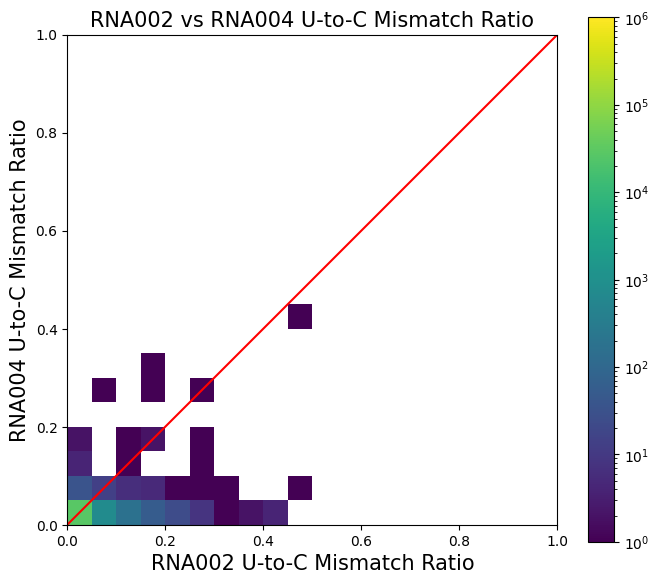

In [15]:
df = pd.read_csv('merged_2_4_T2C_A2G.csv', sep='\t')

df['mismatch_perc2'] = np.where(df['ref_2'] == 'T_2', df['C_perc_2'], df['G_perc_2'])
df['mismatch_perc4'] = np.where(df['ref_4'] == 'T_4', df['C_perc_4'], df['G_perc_4'])

fig, ax = plt.subplots()
fig.set_size_inches(7, 6)

cmap = mpl.cm.viridis
cmap.set_bad('white', 1.0)

bandwith_2d = 0.05

# Create the histogram
h = ax.hist2d(df['mismatch_perc2'], df['mismatch_perc4'], 
              bins=np.arange(0, 1 + bandwith_2d, bandwith_2d), 
              norm=mpl.colors.LogNorm(vmin=1, vmax=1e6), cmap=cmap)

ax.plot((0.0, 1), (0.0, 1), color='red', alpha=1)

# Set axis labels and title
ax.set_xlabel('RNA002 U-to-C Mismatch Ratio', fontsize=15)
ax.set_ylabel('RNA004 U-to-C Mismatch Ratio', fontsize=15)
ax.set_title('RNA002 vs RNA004 U-to-C Mismatch Ratio', fontsize=15)

fig.colorbar(h[3], ax=ax)

ax.set_xlim(0.0, 1)
ax.set_ylim(0.0, 1)
ax.set_aspect('equal')

for spine in ax.spines.values():
    spine.set_color('black')

fig.tight_layout()
plt.show()

### Delta for U-to-C

In [11]:
# delta
df['delta'] = np.abs(df['mismatch_perc2'] - df['mismatch_perc4'])

rna002_higher = (df['mismatch_perc2'] - df['mismatch_perc4'] >= 0.05).sum()
rna004_higher = (df['mismatch_perc4'] - df['mismatch_perc2'] >= 0.05).sum()
within_threshold = (df['delta'] < 0.05).sum()

print(f"For {rna002_higher} sites, RNA002 was 5% higher in U-to-C mismatch.")
print(f"For {rna004_higher} sites, RNA004 was 5% higher in U-to-C mismatch.")
print(f"For {within_threshold} sites, the two chemistries were within 5% of each other.")

For 918 sites, RNA002 was 5% higher in U-to-C mismatch.
For 27 sites, RNA004 was 5% higher in U-to-C mismatch.
For 27962 sites, the two chemistries were within 5% of each other.


### Complementary Cumulative Distribution of U-to-C Mismatch Delta

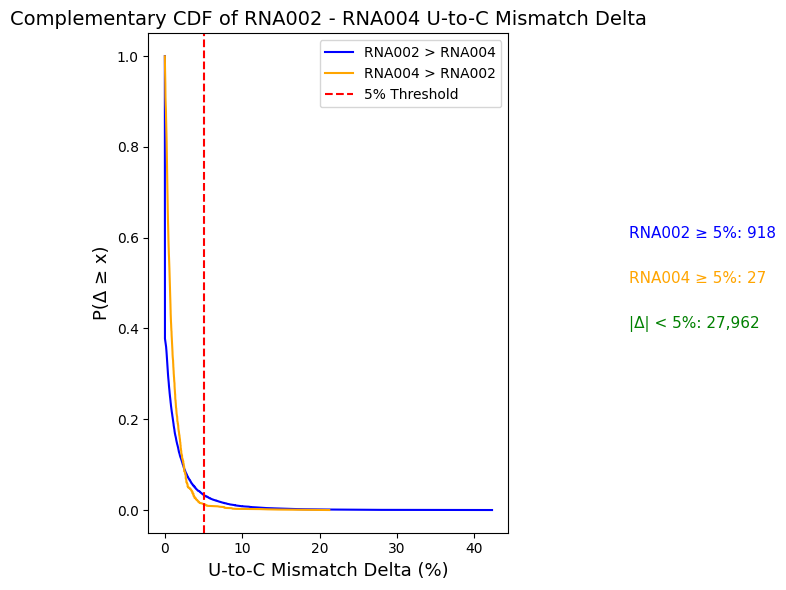

In [12]:
df['delta'] = df['mismatch_perc2'] - df['mismatch_perc4']
df['abs_delta'] = np.abs(df['delta'])

rna002_higher = (df['delta'] >= 0.05).sum()
rna004_higher = (df['delta'] <= -0.05).sum()
within_5_percent = (df['abs_delta'] < 0.05).sum()

pos_delta = df.loc[df['delta'] >= 0, 'delta']
neg_delta = -df.loc[df['delta'] < 0, 'delta']  # flip for positive x axis

sorted_pos = np.sort(pos_delta)
ccdf_pos = 1.0 - np.arange(1, len(sorted_pos)+1) / len(sorted_pos)

sorted_neg = np.sort(neg_delta)
ccdf_neg = 1.0 - np.arange(1, len(sorted_neg)+1) / len(sorted_neg)

x_pos = sorted_pos * 100
x_neg = sorted_neg * 100

plt.figure(figsize=(8, 6))
plt.plot(x_pos, ccdf_pos, label='RNA002 > RNA004', color='blue')
plt.plot(x_neg, ccdf_neg, label='RNA004 > RNA002', color='orange')
plt.axvline(5, color='red', linestyle='--', label='5% Threshold')

plt.text(60, 0.6, f'RNA002 ≥ 5%: {rna002_higher:,}', color='blue', fontsize=11)
plt.text(60, 0.5, f'RNA004 ≥ 5%: {rna004_higher:,}', color='orange', fontsize=11)
plt.text(60, 0.4, f'|Δ| < 5%: {within_5_percent:,}', color='green', fontsize=11)

plt.xlabel('U-to-C Mismatch Delta (%)', fontsize=13)
plt.ylabel('P(Δ ≥ x)', fontsize=13)
plt.title('Complementary CDF of RNA002 - RNA004 U-to-C Mismatch Delta', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### RMSE between RNA004 and RNA002 U-to-C Mismatch_perc

In [16]:
from sklearn.metrics import mean_squared_error
#df['mismatch_perc2']*=100
#df['mismatch_perc4']*=100

# RMSE
valid = df[(df['mismatch_perc2'] > 0) & (df['mismatch_perc4'] > 0)]

# rmse = mean_squared_error(valid['mismatch_perc4'], valid['mismatch_perc2'], squared=False)

mse = mean_squared_error(valid['mismatch_perc4'], valid['mismatch_perc2'])
rmse = np.sqrt(mse)

print(f"RMSE between RNA004 and RNA002 U-to-C Mismatch_perc: {rmse:.4f}")

RMSE between RNA004 and RNA002 U-to-C Mismatch_perc: 0.0427
